# EXPLORATORY DATA ANALYSIS HONORS ASSIGNMENT

## Hello there! 
### This is a project based on california housing dataset. Using this dataset we will be able to predict houses in CALIFORNIA based on features like Median Income of people, House Age, Average rooms in the house, Average bedrooms in the house, population and Average occupation in the area. Also it includes the latitude and longitude of the individual houses. This dataset is pretty large and thus I have to do a lot of data cleaning in this project.

## VISION FOR THE ANALYSIS :

=> The foremost step is gonna be analysing the dataset by using the functions like describe(), info(), head(), tail(), etc.<br> 
=> The next step is to find the null values in the dataset so that we will make actions like removing the missing values or finding the mean or median to apply it in the NAN value, etc.<br>
=> If the dataset does not have null values, we can move on to the next step in data cleaning.<br>
=>We start to get to know about the description of the dataset using the describe() function.<br>
=>We now start with the EDA(Exploratory Data Analysis).<br>
=>Plot graphs with different plots like Histogram, Pairplot, Scatter plot to get a basic idea of the features.<br>
=>Use the Correlation function and plot a heatmap to find the correlation between features/variables to target variables.<br>
=>Once the feature is selected, plot a scatterplot for the feature and target variables.<br>
=>Apply boxplot plotting type to find outliers in the dataset of eacch features and decide whether to find the mean or median , or remove the specific dataset.<br>
=> Formulate hypothesis for the dataset and use statsmodel api to find the summary.<br>



# IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# LOADING THE DATASET

housing = fetch_california_housing(as_frame=True)
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [5]:
housing['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [9]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Analysis:
### All the features in the dataset are non-null values (or) they don't have 0 in them. This means that we don't have to worry about cleaning the dataset by removing or imputing the missing value.
### The next step is to analyze the dataset for more information.


In [11]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
housing.target_names

['MedHouseVal']

In [13]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### From the table, we can infer that there are outliers present in AveRooms,AveBedrooms,AveOccup as there is a large difference in the 75% and max value.

In [15]:
housing.frame.shape

(20640, 9)

#### 20640 - -> dataset/rows and 9 - -> features/variables

## Exploratory data Analysis

### Here, we start to visualize the data to provide interesting insights and find outliers in the data

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

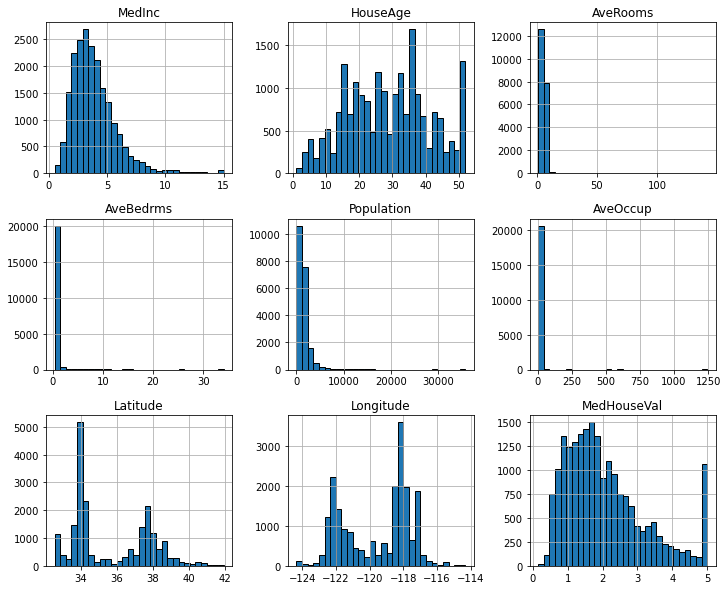

In [16]:
housing.frame.hist(figsize=(12,10),bins=30,edgecolor='black')

## INFERENCE:
#### The Median Income histogram shows that some people are having higher salary (the histogram is rightly-skewed)
#### The House Age histogram is normally distributed

In [17]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


### Finding correlation

In [18]:
correlation = housing.frame.corr()


<AxesSubplot:>

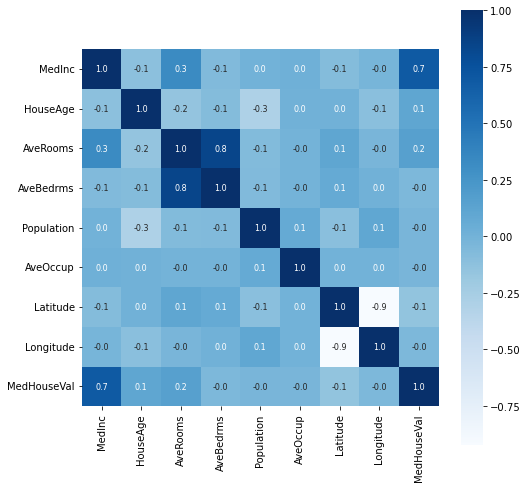

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
# fmt --> Shows the no.of decimal points ; annot represents the feature names ; cmap --> color name

### The most correlated features are (Median income and Median House Value) and (Average Rooms and Average Bedrooms)

In [20]:
correlation['MedHouseVal']

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

## Scatter plot on Median house value based on longitude and latitude

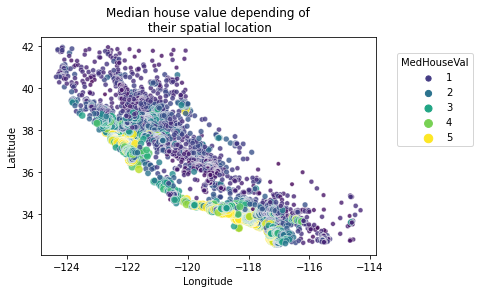

In [21]:
sns.scatterplot(data=housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.8)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [22]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(housing.frame.shape[0]), size=500,
                     replace=False)
# Droping the unwanted columns i.e longitude and latitude
columns_drop = ["Longitude", "Latitude"]
dataset = housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
dataset["MedHouseVal"] = pd.qcut(dataset["MedHouseVal"], 6, retbins=False)
dataset["MedHouseVal"] = dataset["MedHouseVal"].apply(lambda x: x.mid)

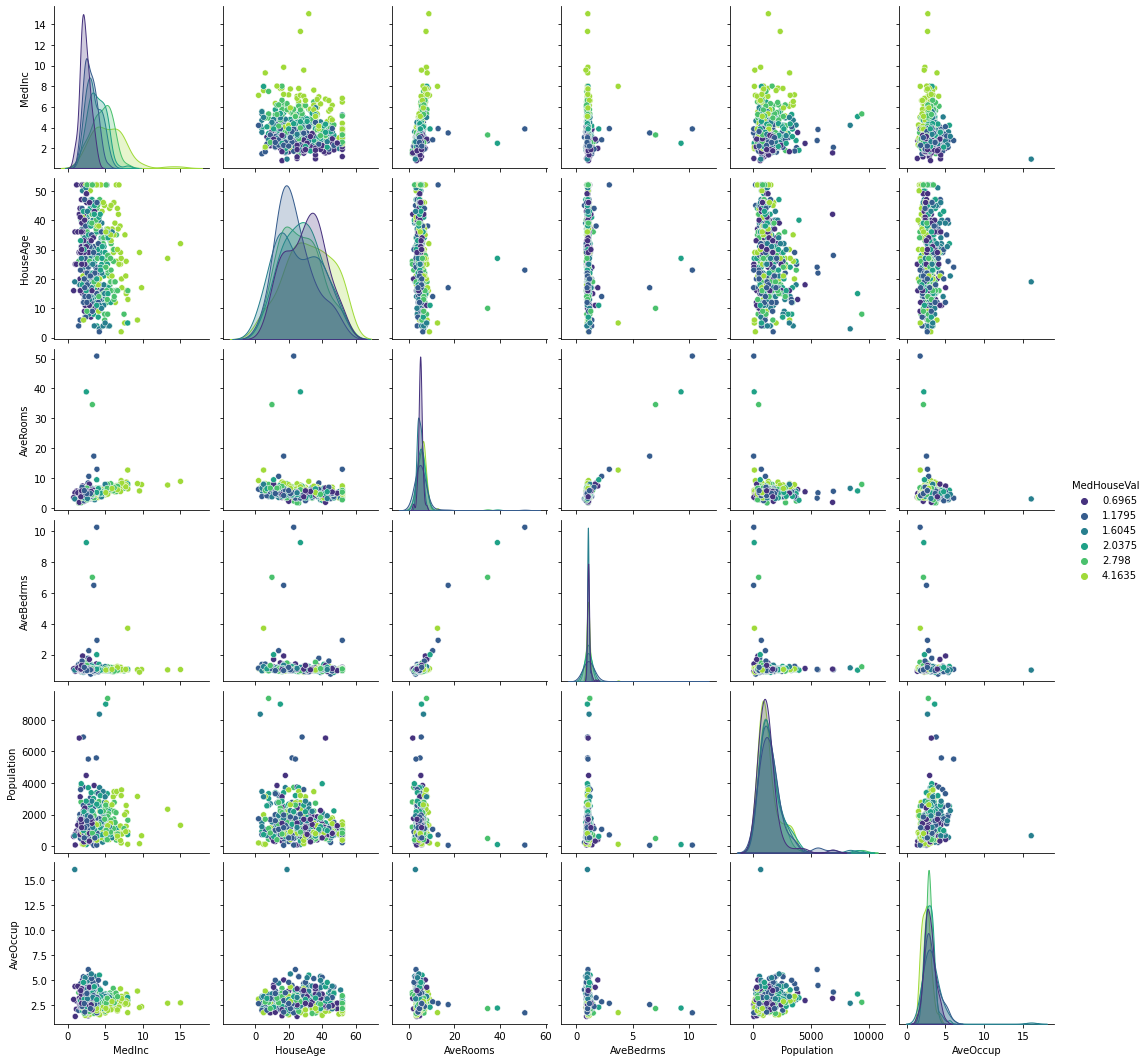

In [23]:
_ = sns.pairplot(data=dataset, hue="MedHouseVal", palette="viridis")

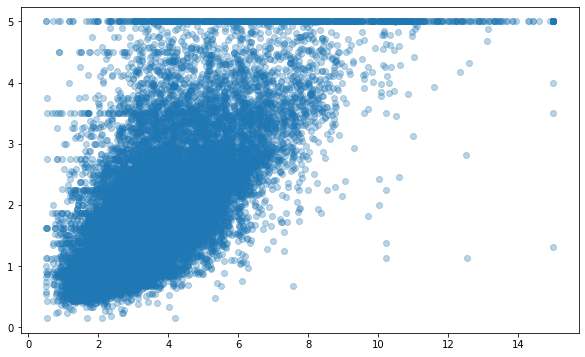

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(y=housing.frame['MedHouseVal'],x=housing.frame['MedInc'],alpha=0.3)

#### A clear line is seen around 500k, 450k and 350k. This might degrade the model

C:\Users\Sabarish\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

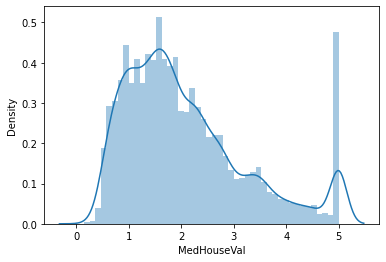

In [29]:
sns.distplot(housing.frame['MedHouseVal'])

In [25]:
num_features=['Longitude', 'Latitude', 'HouseAge', 'AveRooms',
       'AveBedrms', 'Population', 'AveOccup', 'MedInc',
       'MedHouseVal']

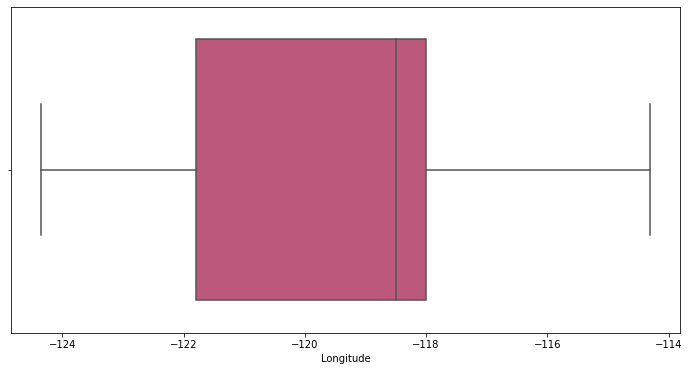

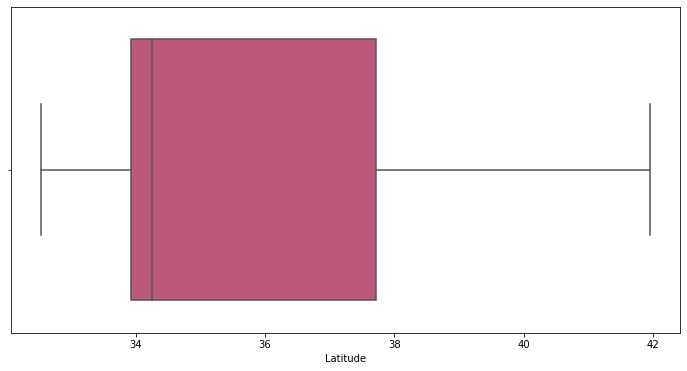

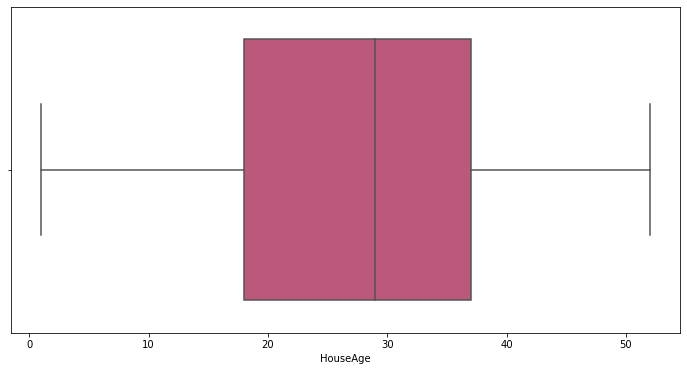

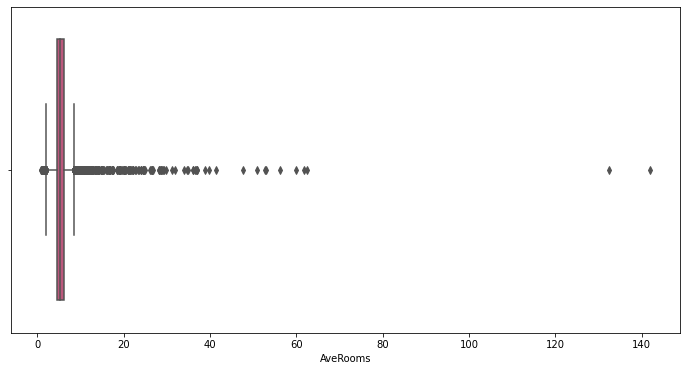

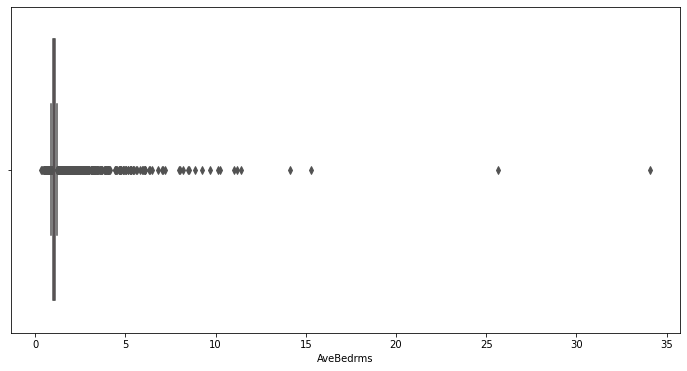

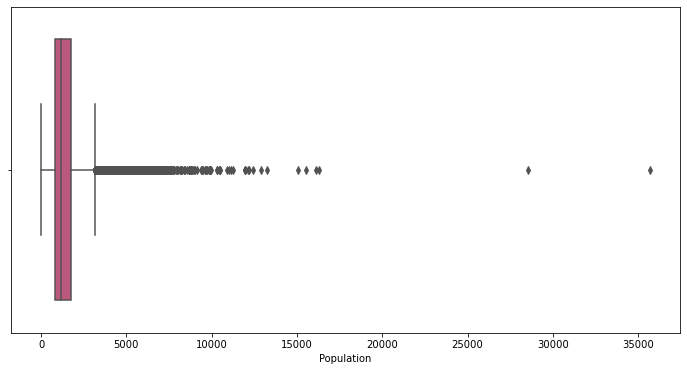

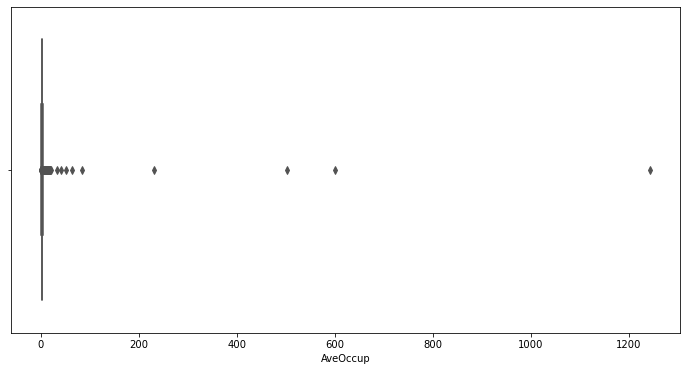

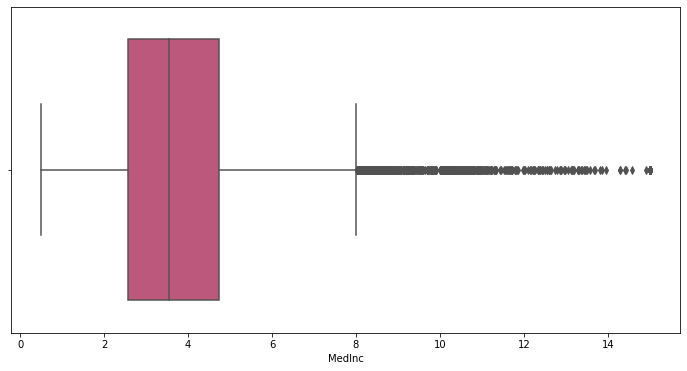

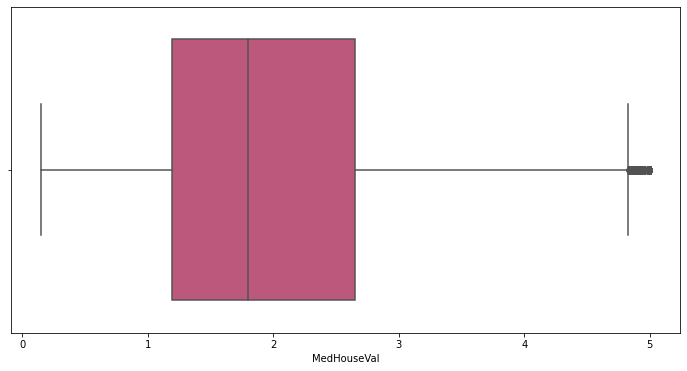

In [26]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=housing.frame, orient="h", palette="plasma")

### As we can see from the barplot, we're supposed to remove the outliers from the data as they can severly change the data's mean and be hard to predict values with more accuracy.

## Removing outlier features

In [52]:
occu = housing.frame.drop('AveOccup',axis=1)
occu

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,39.43,-121.32,0.847


## Linear Regression for Hypothesis Testing

In [32]:
Y = housing.frame['MedHouseVal']
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [33]:
X = housing.frame.drop('MedHouseVal',axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [36]:
import statsmodels.api as sm
X_lm = sm.add_constant(X)
ln = sm.OLS(Y,X_lm).fit()
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:35:30   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### In this case , if P is greater than 0.05, the data is insignificant and it can be removed
